<a href="https://colab.research.google.com/github/talisma-cassoma/plant-disease-study/blob/main/disease_severity_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remove Background
Remove Background notebook by using rembg

## Setup

In [2]:
!pip install -qq rembg==2.0.28
!pip install -qq pillow==9.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.1 MB/s eta 0:00:

## Remove Background

Reset files

In [3]:
!rm -rf /content/output
!mkdir /content/output

Upload files

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Remove background processing

In [5]:
!rembg p /content/drive/MyDrive/plant-disease-segmentation-dataset/working/legiont/image/img/  /content/output

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 429GB/s]
  2% 13/588 [00:54<40:18,  4.21s/it]

Aborted!


# segmentation


read model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,UpSampling2D
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [10]:
from tensorflow.keras.models import load_model

# u-net model
# model_path = '/content/drive/MyDrive/plant-disease-segmentation-dataset/tmp/model/Leaf_segmentation_final.h5'
# custom model
model_path = '/content/drive/MyDrive/plant-disease-segmentation-dataset/tmp/model/custom_leaf_segmentation.h5'

# Load the model
model = load_model(model_path)
# Summarize the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                            

1/1 [==============================] - 0s 71ms/step


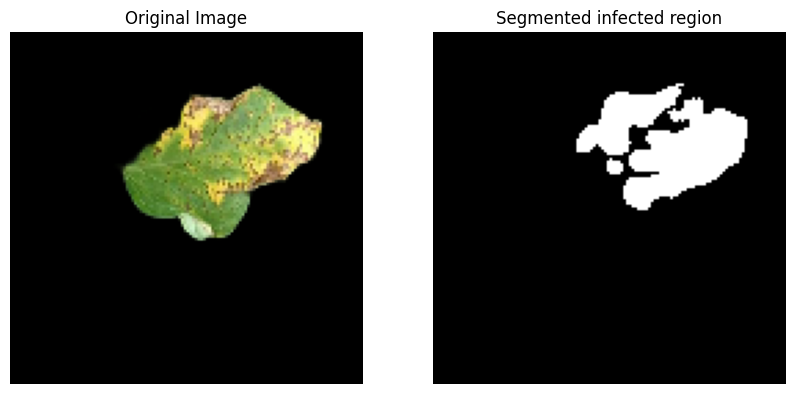

In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the original image to get its size
original_img = Image.open('/content/output/00052_1.png')
original_size = original_img.size

# Load the input image
img_path = '/content/output/00052_1.png'
img = image.load_img(img_path, target_size=(128, 128))  # Adjust target_size according to your model's input shape

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)

# Assuming prediction is a segmentation mask, apply it to the input image
segmented_img = np.squeeze(prediction)  # Remove batch dimension if present
segmented_img = np.where(segmented_img > 0.5, 1, 0)  # Apply a threshold to get binary segmentation mask
#segmented_img *= 255  # Scale mask to [0, 255]

# Resize segmented image to the size of the original image
segmented_img_resized = Image.fromarray(segmented_img.astype(np.uint8) * 255).resize(original_size)

# Save the segmented image as a PNG file
segmented_img_resized.save("/content/output/segmented_image.png")

# Display the original and segmented images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Segmented infected region')
plt.axis('off')

plt.show()


# area estimation

print the health area

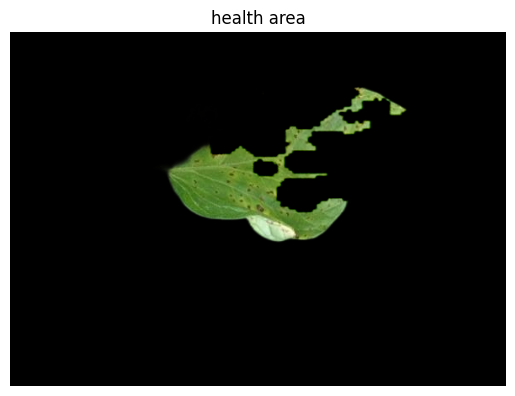

In [34]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Read the images
image1 = cv2.imread('/content/output/00052_1.png')
image2 = cv2.imread('/content/output/segmented_image.png')

# Resize the images to have the same shape
image2_resized = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

# Subtract the images
subtracted = cv2.subtract(image1, image2_resized)

# Save the subtracted image as a PNG file
cv2.imwrite('/content/output/subtracted_image.png', subtracted)

# Display the result image using matplotlib
plt.title('health area')
plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Display the original and segmented images the two images (origal and health area)
#plt.figure(figsize=(10, 5))
# Original image
#plt.subplot(1, 2, 1)
#plt.imshow(img)
#plt.title('Original Image')
#plt.axis('off')
# Display the result image using matplotlib
#plt.subplot(1, 2, 2)
#plt.imshow(cv2.cvtColor(subtracted, cv2.COLOR_BGR2RGB))
#plt.axis('off')  # Turn off axis numbers and ticks
#plt.title('health area')
#plt.show()


save and print infected area colored

1/1 [==============================] - 0s 59ms/step


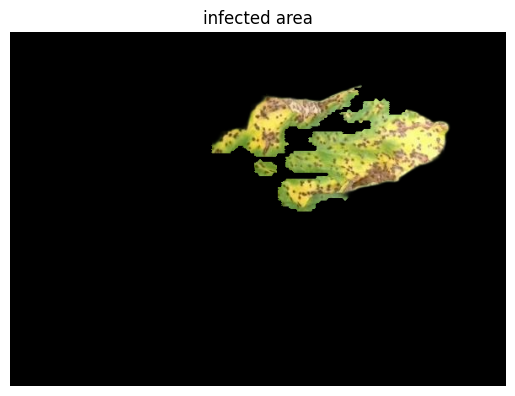

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the original image to get its size
original_img = cv2.imread('/content/output/00052_1.png')

# Load the input image
img_path = '/content/output/00052_1.png'
img = image.load_img(img_path, target_size=(128, 128))  # Adjust target_size according to your model's input shape

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)

# Assuming prediction is a segmentation mask, apply it to the original image
segmented_img = np.squeeze(prediction)
segmented_img = np.where(segmented_img > 0.5, 1, 0).astype(np.uint8)  # Apply a threshold and convert to uint8

# Resize the segmented image mask to match the dimensions of the original image
resized_segmented_img = cv2.resize(segmented_img, (original_img.shape[1], original_img.shape[0]))

# Extract the segmented region from the original image
segmented_region = cv2.bitwise_and(original_img, original_img, mask=resized_segmented_img)

# Save the segmented region with original colors as a PNG file
cv2.imwrite("/content/output/segmented_region.png", segmented_region)

# Display the segmented region
plt.title('infected area')
plt.imshow(cv2.cvtColor(segmented_region, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [32]:
import cv2

# Load the images
plant_image = cv2.imread('/content/output/00052_1.png', cv2.IMREAD_GRAYSCALE)
infected_region = cv2.imread('/content/output/segmented_region.png', cv2.IMREAD_GRAYSCALE)
health_region = cv2.imread('/content/output/subtracted_image.png', cv2.IMREAD_GRAYSCALE)

# Threshold or preprocess the images as needed

# Count non-zero pixels in each image
num_pixels_plant = cv2.countNonZero(plant_image)
num_pixels_infected = cv2.countNonZero(infected_region)
num_pixels_health = cv2.countNonZero(health_region)

# Calculate the total plant area
total_pixels_plant = plant_image.shape[0] * plant_image.shape[1]

# Calculate percentages
percentage_plant = (num_pixels_plant / total_pixels_plant) * 100
percentage_infected = (num_pixels_infected / num_pixels_plant) * 100
percentage_health = (num_pixels_health / num_pixels_plant) * 100

print("Number of pixels in plant area:", num_pixels_plant)
print("Number of pixels in infected region:", num_pixels_infected)
print("Number of pixels in healthy region:", num_pixels_health)
print("Total number of pixels in the plant area:", total_pixels_plant)

#print("Percentage of plant area relative to the total image: {}%".format(percentage_plant))
print("Percentage of infected region relative to the isolated plant region: {}%".format(percentage_infected))
print("Percentage of healthy region relative to the isolated plant region: {}%".format(percentage_health))

Number of pixels in plant area: 38550
Number of pixels in infected region: 21625
Number of pixels in healthy region: 17042
Total number of pixels in the plant area: 247380
Percentage of infected region relative to the isolated plant region: 56.09597924773022%
Percentage of healthy region relative to the isolated plant region: 44.20752269779507%
